# Importing Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Preparation

In [2]:
df = pd.read_csv('data.csv')
df.head(n = 2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [3]:
len(df)

11914

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

# Distribution of price

<Axes: xlabel='msrp', ylabel='Count'>

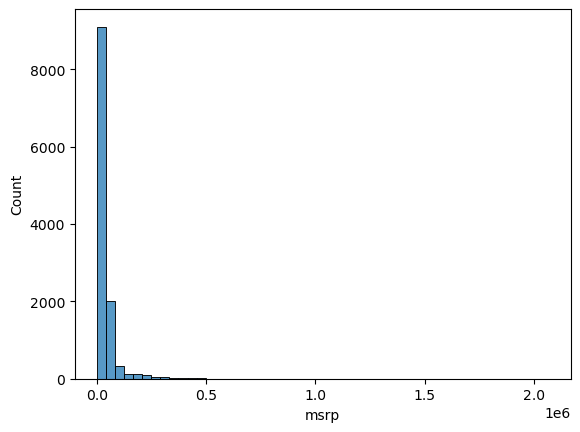

In [7]:
sns.histplot(df.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

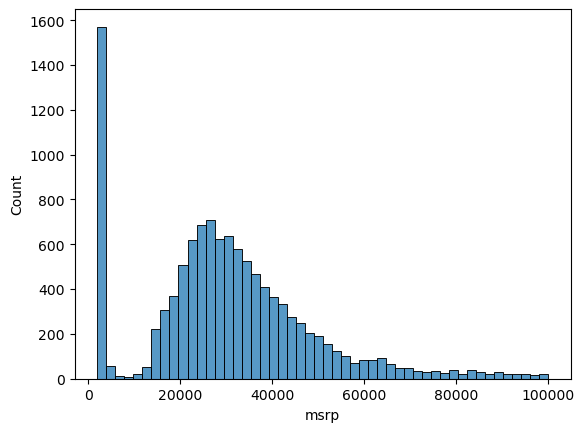

In [8]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

#### There is a long tail in the distribution. It will confuse our ML model. To get rid of the problem, we will use logarithmic distribution.

In [9]:
np.log1p([0, 1, 10, 100, 1000])
# is equivalent to np.log([0 + 1, 1 + 1, 10 + 1, 100 + 1, 1000 + 1])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [10]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: ylabel='Count'>

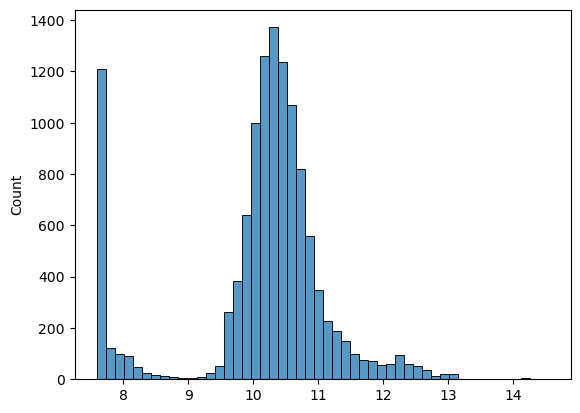

In [11]:
sns.histplot(price_logs.values, bins = 50)

#### This is called the normal distribution. This kind of distribution is ideal for the ML model. In this case of distribution, model performs well.

# Missing values

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting Up the Validation framework

In [13]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

In [14]:
xi = [453.0, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [15]:
def LinearRegression(xi, w, w0):
    n = len(xi)
    
    pred = w0
    
    for i in range(n):
        pred += w[i] * xi[i]
    return pred

In [16]:
price = LinearRegression(xi, w, w0)
price = np.expm1(price)
price

222347.2221101062

# Linear Regression Vector Form

In [17]:
xi = [453.0, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [18]:
w_new = [w0] + w
xi_new = [1] + xi

In [19]:
def LinearRegression(xi, w):
    return np.dot(xi, w)

In [20]:
price = LinearRegression(xi_new, w_new)
price = np.expm1(price)
price

222347.2221101062

###  Generalize for multiple cars

In [21]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)


w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [22]:
def LinearRegression(X, w):
    return X.dot(w)

In [23]:
price = LinearRegression(X, w_new)
price = np.array(price)
price = np.expm1(price)
price

array([237992.82334859, 768348.51018973, 222347.22211011])

# Training a liner regression model

In [24]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86]
]
X = np.array(X)
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [25]:
def TrainLinearRegression(X, y):
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [26]:
w0, w = TrainLinearRegression(X, y)
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car price baseline model

In [27]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
df_train[base].head(n = 2)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031


In [28]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [29]:
def prepareX(df, base):
    for col in base:
        df[col].fillna(df[col].median(), inplace = True)
    
    X_train = df[base].values
    
    return X_train

In [30]:
X_train = prepareX(df_train, base)
X_train[:2]

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.]])

In [31]:
np.isnan(X_train).sum()

0

In [32]:
w0, w = TrainLinearRegression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.52427764,  9.34947071,  9.60391562, ..., 10.32059171,
       11.90854663, 10.00234003])

<Axes: ylabel='Count'>

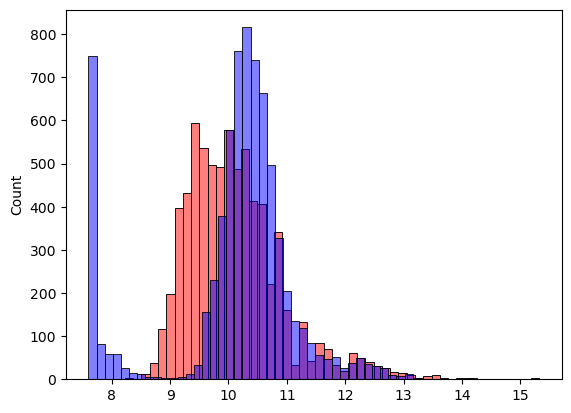

In [33]:
sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red')
sns.histplot(y_train, bins = 50, alpha = 0.5, color = 'blue')

# RMSE

In [34]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [35]:
rmse(y_train, y_pred)

0.7557879506462996

# Validating the model

In [36]:
X_train = prepareX(df_train, base)
w0, w = TrainLinearRegression(X_train, y_train)

X_val = prepareX(df_val, base)
y_pred = w0 + X_val.dot(w)

rmse(y_pred, y_val)

0.7496911329574685